In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 100
sns.set_style('whitegrid')

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

In [2]:
trainDF = pd.read_csv('train.csv')
testDF  = pd.read_csv('test.csv')

In [3]:
trainDF.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
trainDF.shape

(15120, 56)

In [5]:
# no missing data
np.where(trainDF.isnull().values)

(array([], dtype=int64), array([], dtype=int64))

In [6]:
trainDF.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,...,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,...,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [7]:
trainX = trainDF.iloc[:,:-1]
trainY = trainDF.iloc[:,-1]

In [8]:
trainX = trainX.drop('Id', axis=1)
print(trainX.shape)
trainX.head()

(15120, 54)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,...,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
colName = trainX.columns

valueCountMat = np.zeros((trainX.shape[1], 1)).astype('int')
variableType = {'categorical':[], 'binary':[], 'const':[]}

for n in np.arange(trainX.shape[1]):
    valueCountMat[n] = len(trainX[colName[n]].value_counts())
    if valueCountMat[n] > 2:
        variableType['categorical'].append(colName[n])
    elif valueCountMat[n] == 2:
        variableType['binary'].append(colName[n])
    else:
        variableType['const'].append(colName[n])

In [10]:
print('%i categorical variables in train set.' %len(variableType['categorical']))
print('%i binary variables in train set.' %len(variableType['binary']))
print('const variables in train set, they are %s' %variableType['const'])

10 categorical variables in train set.
42 binary variables in train set.
const variables in train set, they are ['Soil_Type7', 'Soil_Type15']


In [11]:
#for s in variableType['const']:
#    trainX = trainX.drop(s, axis=1)

In [12]:
colName = trainX.columns

## Correlation between categorical variables

In [13]:
train_categorial = trainX[variableType['categorical']]

In [14]:
train_categorial_corr = train_categorial.corr()

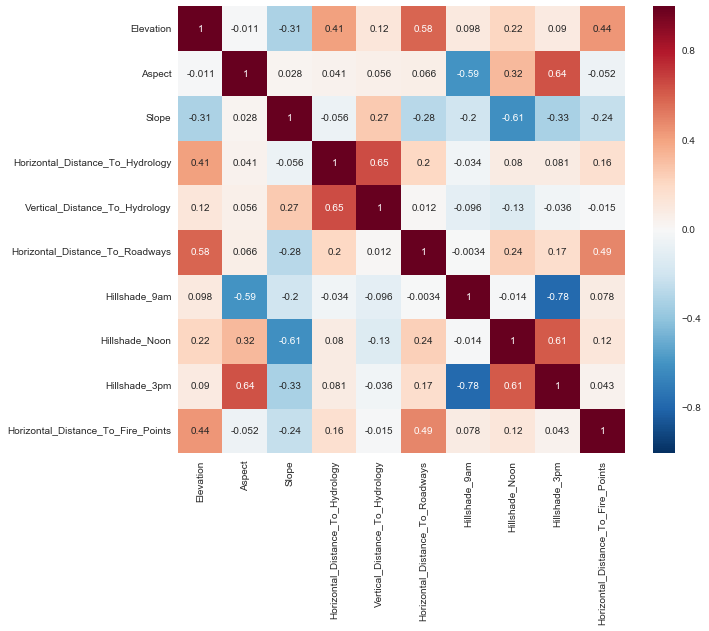

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(train_categorial_corr, annot=True);

In [16]:
# we select pair of variables while their correlation is higher than threshold or low than -threshold
corr_threshold = 0.5



In [17]:
train_categorial_corr.shape

(10, 10)

In [18]:
variableType['categorical']

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [19]:
pd.DataFrame(data=train_categorial_corr, columns=variableType['categorical'], index=variableType['categorical'])

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000


In [20]:
corr_list = []
corr_threshold = 0.5

for i in np.arange(train_categorial_corr.shape[0]):
    for j in np.arange(i+1, train_categorial_corr.shape[0]):
        #print(i, j)
        if abs(train_categorial_corr.iloc[i, j]) > corr_threshold:
            corr_list.append(['%s and %s' %(variableType['categorical'][i], variableType['categorical'][j]), \
                              train_categorial_corr.iloc[i, j]])
            #print ("%s and %s = %.2f" % (cols[i],cols[j],v))

In [21]:
corr_list

[['Elevation and Horizontal_Distance_To_Roadways', 0.57865899073400673],
 ['Aspect and Hillshade_9am', -0.59399742813131118],
 ['Aspect and Hillshade_3pm', 0.635022364019874],
 ['Slope and Hillshade_Noon', -0.61261287241726925],
 ['Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology',
  0.65214247123573643],
 ['Hillshade_9am and Hillshade_3pm', -0.77996474244754399],
 ['Hillshade_Noon and Hillshade_3pm', 0.61452638724757791]]

In [22]:
#sorted(corr_list ,key=lambda x: x[1], reverse=True)
#sorted(corr_list ,key=lambda x: x[1])
sort_corr_list = sorted(corr_list, key=lambda x: -abs(x[1]))

In [23]:
for i, j in sort_corr_list:
    print('%s %.2f'%(i, j))

Hillshade_9am and Hillshade_3pm -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology 0.65
Aspect and Hillshade_3pm 0.64
Hillshade_Noon and Hillshade_3pm 0.61
Slope and Hillshade_Noon -0.61
Aspect and Hillshade_9am -0.59
Elevation and Horizontal_Distance_To_Roadways 0.58


## converse one hot encoder valued variables to categorical valued variables

In [24]:
variableType['binary']

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [25]:
variableType['binary'][0:4]

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4']

In [26]:
idx_binary_2_categorical_type_1 = [np.argwhere(colName == dataType)[0] for dataType in variableType['binary'][0:4]]
idx_binary_2_categorical_type_1 = np.squeeze(idx_binary_2_categorical_type_1)

idx_binary_2_categorical_type_2 = [np.argwhere(colName == dataType)[0] for dataType in variableType['binary'][4:]]
idx_binary_2_categorical_type_2 = np.squeeze(idx_binary_2_categorical_type_2)

In [27]:
idx_binary_2_categorical_type_1

array([10, 11, 12, 13])

In [28]:
idx_binary_2_categorical_type_2

array([14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53])

In [29]:
train_binary_2_categorical = np.zeros((trainX.shape[0], 2))
#train_binary_2_categorical_type_1 = []

for n in np.arange(trainX.shape[0]):
    #train_binary_2_categorical_type_1.append(trainX.iloc[n, idx_binary_2_categorical_type_1].\
    #                                         index[np.argwhere(trainX.iloc[n, idx_binary_2_categorical_type_1] == 1)].\
    #                                         values[0,:].astype(str))
    train_binary_2_categorical[n, 0] = (np.where(trainX.iloc[n, idx_binary_2_categorical_type_1] == 1)[0] + 1).astype(int)

In [30]:
#print(trainX.iloc[10000, idx_binary_2_categorical_type_1].
#\index[np.argwhere(trainX.iloc[10000, idx_binary_2_categorical_type_1] == 1)].values[0,:].astype(str))

In [31]:
#Wilderness_Area_Dictionary = {
#                            "Wilderness_Area1": 1,
#                            "Wilderness_Area2": 2,
#                            "Wilderness_Area3": 3,
#                            "Wilderness_Area4": 4
#                            }

In [32]:
#train_binary_2_categorical_type_1

In [33]:
np.array(np.where(trainX.iloc[2, idx_binary_2_categorical_type_2] == 1))[0]

array([10])

In [34]:
train_binary_2_categorical

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 3.,  0.],
       [ 3.,  0.],
       [ 3.,  0.]])

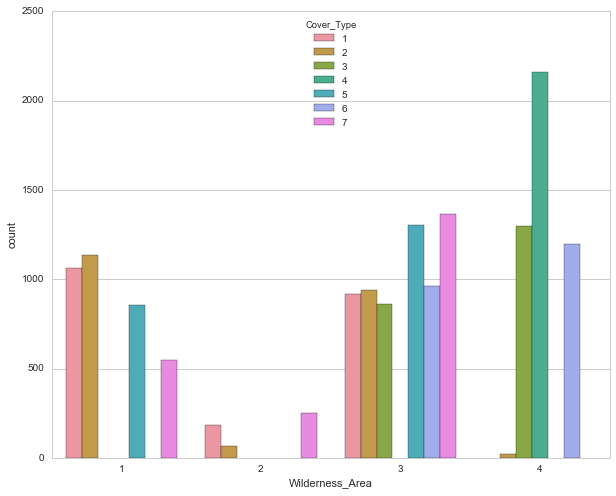

In [35]:
# Group one-hot encoded variables of a category into one single variable

#names of all the columns
cols = trainX.columns

#number of rows=r , number of columns=c
trainX_rowNum, trainX_colNum = trainX.shape

#Create a new dataframe with r rows, one column for each encoded category, and target in the end
data = pd.DataFrame(index=np.arange(0, trainX_rowNum), columns=['Wilderness_Area','Soil_Type','Cover_Type'])

#Make an entry in 'data' for each r as category_id, target value
for i in np.arange(0, trainX_rowNum):
    w=0;
    s=0;
    # Category1 range
    for j in range(10,14):
        if (trainX.iloc[i,j] == 1):
            w = j-9  #category class
            break
    # Category2 range        
    for k in range(14,54):
        if (trainX.iloc[i,k] == 1):
            s = k-13 #category class
            break
    #Make an entry in 'data' for each r as category_id, target value        
    data.iloc[i]=[w, s, trainDF.iloc[i,-1]]

#Plot for Category1   
plt.figure(figsize=(10, 8))
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=data);
#plt.show()

#(right-click and open the image in a new window for larger size)
#WildernessArea_4 has a lot of presence for cover_type 4. Good class distinction
#WildernessArea_3 has not much class distinction
#SoilType 1-6,10-14,17, 22-23, 29-33,35,38-40 offer lot of class distinction as counts for some are very high

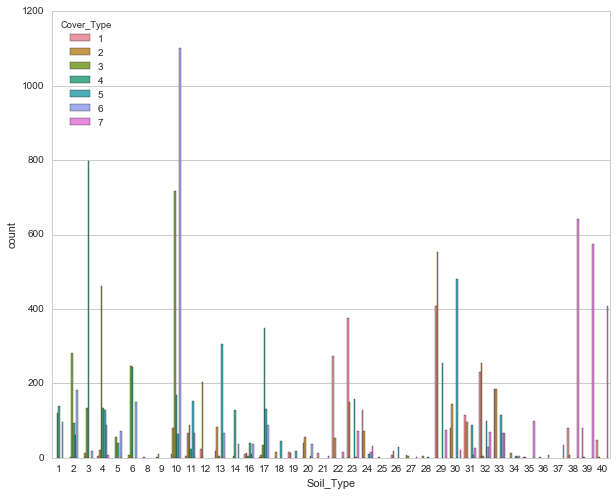

In [36]:
#Plot for Category2
plt.figure(figsize=(10, 8))
#plt.rc("figure", figsize=(25, 10))
sns.countplot(x="Soil_Type", hue="Cover_Type", data=data);
#plt.show()

In [37]:
trainX.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

#### Data cleaning

In [38]:
for s in variableType['const']:
    trainX = trainX.drop(s, axis=1)

In [39]:
trainX.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')

## Data preparation -- 'standardize'

To standardize data, we have three ways and for those missing data we can simply impute data by using mean, median, etc.

In [40]:
# standardize to standard Normal distribution
from sklearn.preprocessing import StandardScaler

# standardize to values from [0, 1] range
from sklearn.preprocessing import MinMaxScaler

# standardize to values with unit L2 norm
from sklearn.preprocessing import Normalizer

# impose mean, median, etc values to missing values
from sklearn.preprocessing import Imputer

In [41]:
# names of all the columns
colName = trainX.columns

# row and column numbers in training set
trainX_rowNum, trainX_colNum = trainX.shape

# index for column names
idxColName = []
for i in np.arange(trainX_colNum):
    idxColName.append(i)
    
# retrive the values from DataFrame format
trainX_value = trainX.values

# also we want the label variables
trainY_value = trainDF['Cover_Type'].values

# create a list for storing importance rank
varImpRank = []

Before we standardize train set, we need to split the entire dataset into training and validation since we would need to apply learning methods on training set to evaluate the variable importance therefore it has to be validated on validation set

In [42]:
# Validation chunk size
valid_size = 0.1

# Use a common seed in all experiments so that same chunk is used for validation
seed = 0

# activate train_test_split function to get training set and validation set
from sklearn.cross_validation import train_test_split

xtrain, xvalid, ytrain, yvalid = train_test_split(trainX_value, trainY_value, test_size = valid_size, random_state=seed)

In [44]:
colName

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')

In [45]:
#All features
X_all = []

#Additionally we will make a list of subsets
X_all_add =[]

#columns to be dropped
rem = []

#indexes of columns to be dropped
i_rem = []

#List of combinations
comb = []
comb.append("All+100% top important variables")

# the column names and the index of column that we want to keep
colName_InOGData = colName
i_cols = []

#Add this version of X to the list 
X_all.append(['Orig','All', xtrain, xvalid, 1.0, colName_InOGData, rem, varImpRank, i_cols, i_rem])

#point where categorical data begins
size_categoric_variable = 10

In [46]:
#Standardized
#Apply transform only for non-categorical data
X_temp = StandardScaler().fit_transform(xtrain[:,0:size_categoric_variable])
X_val_temp = StandardScaler().fit_transform(xvalid[:,0:size_categoric_variable])

#Concatenate non-categorical data and categorical
X_con = np.hstack((X_temp, xtrain[:, size_categoric_variable:]))
X_val_con = np.hstack((X_val_temp, xvalid[:, size_categoric_variable:]))

#Add this version of X to the list 
X_all.append(['StdSca','All', X_con, X_val_con, 1.0, colName, rem, varImpRank, i_cols, i_rem])

##Apply transform only for non-categorical data
X_temp = MinMaxScaler().fit_transform(xtrain[:,0:size_categoric_variable])
X_val_temp = MinMaxScaler().fit_transform(xvalid[:,0:size_categoric_variable])

#Concatenate non-categorical data and categorical
X_con = np.hstack((X_temp, xtrain[:, size_categoric_variable:]))
X_val_con = np.hstack((X_val_temp, xvalid[:, size_categoric_variable:]))

#Add this version of X to the list 
X_all.append(['MinMax','All', X_con, X_val_con, 1.0, colName, rem, varImpRank, i_cols, i_rem])

##Apply transform only for non-categorical data
X_temp = Normalizer().fit_transform(xtrain[:,0:size_categoric_variable])
X_val_temp = Normalizer().fit_transform(xvalid[:,0:size_categoric_variable])

#Concatenate non-categorical data and categorical
X_con = np.hstack((X_temp, xtrain[:, size_categoric_variable:]))
X_val_con = np.hstack((X_val_temp, xvalid[:, size_categoric_variable:]))

#Add this version of X to the list 
X_all.append(['Norm','All', X_con, X_val_con, 1.0, colName, rem, varImpRank, i_cols, i_rem])

/anaconda/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype

In [47]:
#List of transformations
trans_list = []

for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
    trans_list.append(trans)

In [48]:
trans_list

['Orig', 'StdSca', 'MinMax', 'Norm']

# Feature selection

1. ExtraTreesClassifier
2. GradientBoostingClassifier
3. RandomForestClassifier
4. XGBoostClassifier

In [49]:
#Select top 75%,50%,25%

top_varImp = [0.75,0.50,0.25]

In [50]:
#List of feature selection models
feat = []

#List of names of feature selection models
feat_list =[]

In [51]:
#Import model we want to use for feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
#Add ExtraTreeClassifiers to the list

n = 'ExTree'
feat_list.append(n)

for val in top_varImp:
    comb.append("%s+%i%% top important variables" % (n,(100*val)))
    feat.append([n,val,ExtraTreesClassifier(n_estimators=trainX_colNum,max_features=val,n_jobs=-1,random_state=seed)])      

In [53]:
#Add RandomForestClassifiers to the list 
n = 'RndFst'
feat_list.append(n)

for val in top_varImp:
    comb.append("%s+%i%% top important variables" % (n,(100*val)))
    feat.append([n,val,RandomForestClassifier(n_estimators=trainX_colNum,max_features=val,n_jobs=-1,random_state=seed)])   

In [54]:
comb

['All+100% top important variables',
 'ExTree+75% top important variables',
 'ExTree+50% top important variables',
 'ExTree+25% top important variables',
 'RndFst+75% top important variables',
 'RndFst+50% top important variables',
 'RndFst+25% top important variables']

In [55]:
feat

[['ExTree',
  0.75,
  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
             max_depth=None, max_features=0.75, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=-1,
             oob_score=False, random_state=0, verbose=0, warm_start=False)],
 ['ExTree',
  0.5,
  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
             max_depth=None, max_features=0.5, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=-1,
             oob_score=False, random_state=0, verbose=0, warm_start=False)],
 ['ExTree',
  0.25,
  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
             max_depth=None, max_features=0.25, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_e

In [56]:
#For all transformations of X
# trains: standarization -- original, StandardScaler, MinMaxScaler, Normalizer
# s: 'All' -- 'All' data used -- xtrain(og)+xvalid(og) or xtrain(standardized)+xvalid(standardized)
# X: xtrain (og or standardized features of training set)
# X_val: xvalid (og or standardized features of validation set)
# d: how many proportion of data are used to build model, default is 1 -- 100%
# rem: column names that we want to remove/drop
# ra: rank list that store the importance of features (values are retrieved from learning methods built)
# i_cols: index of all column names in original dataframe
# i_rem: index of columns that we want to remove
for trans, s, X, X_val, d, cols, rem, ra, i_cols, i_rem in X_all:
    #For all feature selection models
    # name: name of model we are going to build -- ExTree, RnF, GradientBoost, Xgboost
    # V: proportion of features that we want to keep
    # model: model we want to fit/build (hyper-parameters, e.g. number of trees/max_feature are set)
    for name, v, model in feat:
        print(name)
        #Train the model using standardized features and their responses
        model.fit(X,ytrain)
        
        #Combine importance and index of the column in the array joined
        varImp_ColName_Idx = []
        for i, varImp in enumerate(model.feature_importances_):
            varImp_ColName_Idx.append([i, colName[i], varImp])
        
        # x-value ascending order, -VarImg smaller --> rank higher --> VarImg larger --> rank higher   
        varImp_ColName_Idx_sorted = sorted(varImp_ColName_Idx, key=lambda x: -x[2])
        
        #Starting point of the columns to be dropped
        rem_start = int((v * trainX_colNum))
        
        #List of names of columns selected
        cols_list = []
        
        #Indexes of columns selected
        i_cols_list = []
        
        #Ranking of all the columns
        rank_list =[]
        
        #List of columns not selected
        rem_list = []
        
        #Indexes of columns not selected
        i_rem_list = []
        
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for varImpRank, (idxInDF, col, x) in enumerate(varImp_ColName_Idx_sorted):
            #Store the rank
            rank_list.append([idxInDF,varImpRank])
            #Store selected columns in cols_list and indexes in i_cols_list
            if(varImpRank < rem_start):
                cols_list.append(col)
                i_cols_list.append(idxInDF)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
                
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list])  

ExTree
ExTree
ExTree
RndFst
RndFst
RndFst
ExTree
ExTree
ExTree
RndFst
RndFst
RndFst
ExTree
ExTree
ExTree
RndFst
RndFst
RndFst
ExTree
ExTree
ExTree
RndFst
RndFst
RndFst


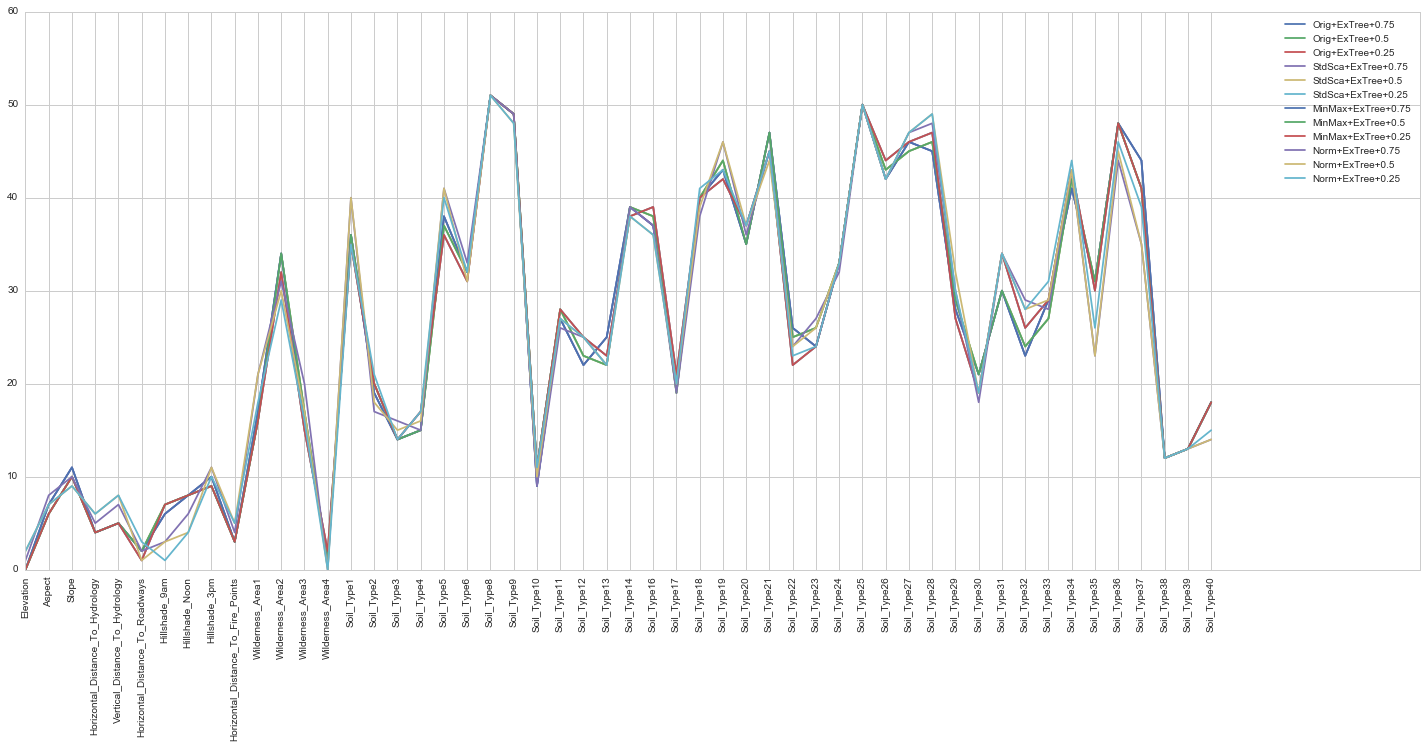

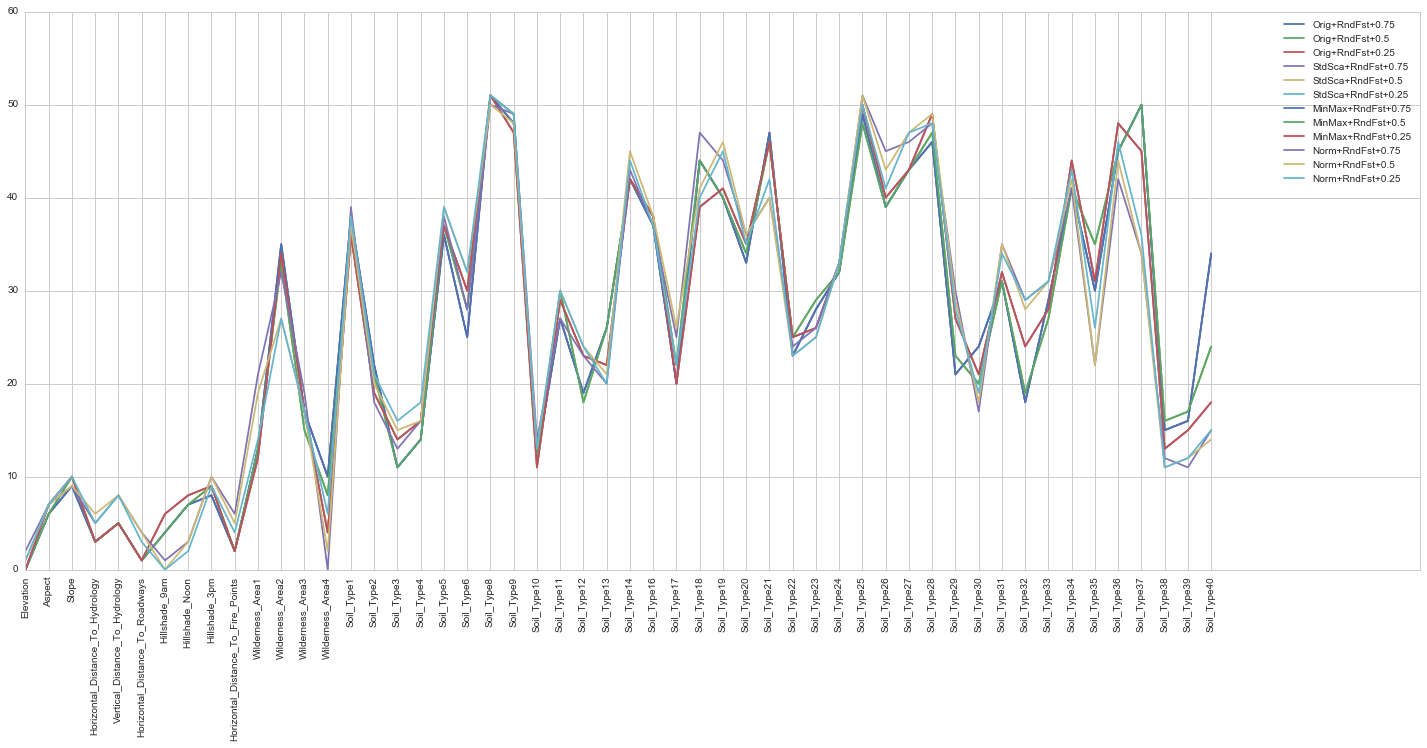

In [58]:
#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot a graph for different feature selectors        
for f_name in feat_list:
    #Array to store the list of combinations
    leg=[]
    fig, ax = plt.subplots()
    #Plot each combination
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        if(name==f_name):
            plt.plot(rank_list)
            leg.append(trans+"+"+name+"+%s"% v)
    #Set the tick names to names of columns
    ax.set_xticks(range(trainX_colNum))
    ax.set_xticklabels(colName,rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    

Given models used for selection: ExtraTreeClassifier, Random Forest and Gradient Boost

Given the proportion important features: 75%, 50% and 25%

Return a list of ranks for features

In [59]:
propVals = [0.75, 0.5, 0.25]
methods = ['ExTree', 'RnF', 'GBoost']

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
method_propVal_combination = []

for method in methods:
    for propVal in propVals:
        if method == 'ExTree':
            model = ExtraTreesClassifier(n_estimators=trainX_colNum, max_features=propVal)
        elif method == 'RnF':
            model = RandomForestClassifier(n_estimators=trainX_colNum, max_features=propVal)
        elif method == 'GBoost':
            model = GradientBoostingClassifier(n_estimators=trainX_colNum, max_features=propVal)
        
        method_propVal_combination.append([method, method+' + %.2f important features'%propVal, propVal, model])

In [62]:
trans_data_rank_featureSelect_featureDiscard_list = []

# loop over all types data (original format and all three types of standardization)
for standardTrans, _, xtrain, xvalid, _, colNameInData, remCol, rank, i_cols, i_rem in X_all:
    # after read-in xtrain, we want to loop over all models we want to use to evaluate importance
    for method, detail, propVal, model in method_propVal_combination:
        # we fit the model to sub-training set and its corresponding response y values
        print(standardTrans, detail)
        model.fit(xtrain, ytrain)
                        
        # record column name, index and feature importance value
        colIdx_colNameVarImg_varImgVal = []
        
        for idx, varImgVal in enumerate(model.feature_importances_):
            colIdx_colNameVarImg_varImgVal.append([idx, colNameInData[idx], varImgVal])
        
        # sort the ranks in descending order
        colIdx_colNameVarImg_varImgVal_sort = sorted(colIdx_colNameVarImg_varImgVal, key = lambda x: -x[2])
        
        # how many feature we want to store as import features
        numVarImg = int(trainX_colNum * propVal)
        
        # create a list to store ranks of all features, two lists to store the selected feature names and theire index
        rank_allFeature_list = []
        colName_featureSelected = []
        colIdx_featureSelected = []
        
        # create two listed to store the discarded feature names and theire index
        colName_featureDiscarded = []
        colIdx_featureDiscarded = []
        
        # we select the features based on numVarImg and ranked index
        for j, (colNameIdx, colName_sorted, varImg) in enumerate(colIdx_colNameVarImg_varImgVal_sort):
            # store ranks of all features -- j is the rank and colNameIdx is the feature index of j-th ranked
            rank_allFeature_list.append([j, colNameIdx])
            
            # if the underlying rank of feature is less than number of features we want to keep, then keep it
            if colNameIdx < numVarImg:
                colName_featureSelected.append(colName_sorted)
                colIdx_featureSelected.append(colNameIdx)
            else:
                colName_featureDiscarded.append(colName_sorted)
                colIdx_featureDiscarded.append(colNameIdx)
                
        # we want to sort the rank_allFeature list to order becomes
        # rank 1 -- x-th column in data --> rank x -- 0-th column in data
        # rank 2 -- y-th column in data --> rank y -- 1-st column in data
        # rank 3 -- z-th column in data --> rank z -- 2-nd column in data
        rank_allFeature_list_sort = sorted(rank_allFeature_list, key=lambda x: x[1])
        
        
        ## save the entire result
        trans_data_rank_featureSelect_featureDiscard_list.append([standardTrans, method, detail, propVal, xtrain, xvalid, \
                                                                 rank_allFeature_list_sort, colName_featureSelected,\
                                                                 colIdx_featureSelected, colName_featureDiscarded,\
                                                                 colIdx_featureDiscarded])

Orig ExTree + 0.75 important features
Orig ExTree + 0.50 important features
Orig ExTree + 0.25 important features
Orig RnF + 0.75 important features
Orig RnF + 0.50 important features
Orig RnF + 0.25 important features
Orig GBoost + 0.75 important features
Orig GBoost + 0.50 important features
Orig GBoost + 0.25 important features
StdSca ExTree + 0.75 important features
StdSca ExTree + 0.50 important features
StdSca ExTree + 0.25 important features
StdSca RnF + 0.75 important features
StdSca RnF + 0.50 important features
StdSca RnF + 0.25 important features
StdSca GBoost + 0.75 important features
StdSca GBoost + 0.50 important features
StdSca GBoost + 0.25 important features
MinMax ExTree + 0.75 important features
MinMax ExTree + 0.50 important features
MinMax ExTree + 0.25 important features
MinMax RnF + 0.75 important features
MinMax RnF + 0.50 important features
MinMax RnF + 0.25 important features
MinMax GBoost + 0.75 important features
MinMax GBoost + 0.50 important features
MinMa

In [63]:
trans_data_rank_featureSelect_featureDiscard_list

[['Orig',
  'ExTree',
  'ExTree + 0.75 important features',
  0.75,
  array([[2968,   64,   22, ...,    0,    0,    0],
         [2356,   69,   22, ...,    0,    0,    0],
         [2533,   54,    6, ...,    0,    0,    0],
         ..., 
         [3515,  158,   27, ...,    0,    0,    0],
         [2575,   80,   35, ...,    0,    0,    0],
         [2738,  304,    9, ...,    0,    0,    0]]),
  array([[2220,   18,   12, ...,    0,    0,    0],
         [2139,  119,   10, ...,    0,    0,    0],
         [2292,  109,   26, ...,    0,    0,    0],
         ..., 
         [2396,  102,   13, ...,    0,    0,    0],
         [2372,   76,   19, ...,    0,    0,    0],
         [2354,  313,   23, ...,    0,    0,    0]]),
  [[0, 0],
   [6, 1],
   [11, 2],
   [4, 3],
   [5, 4],
   [2, 5],
   [7, 6],
   [8, 7],
   [10, 8],
   [3, 9],
   [16, 10],
   [34, 11],
   [18, 12],
   [1, 13],
   [36, 14],
   [20, 15],
   [13, 16],
   [15, 17],
   [37, 18],
   [30, 19],
   [51, 20],
   [49, 21],
   [9, 

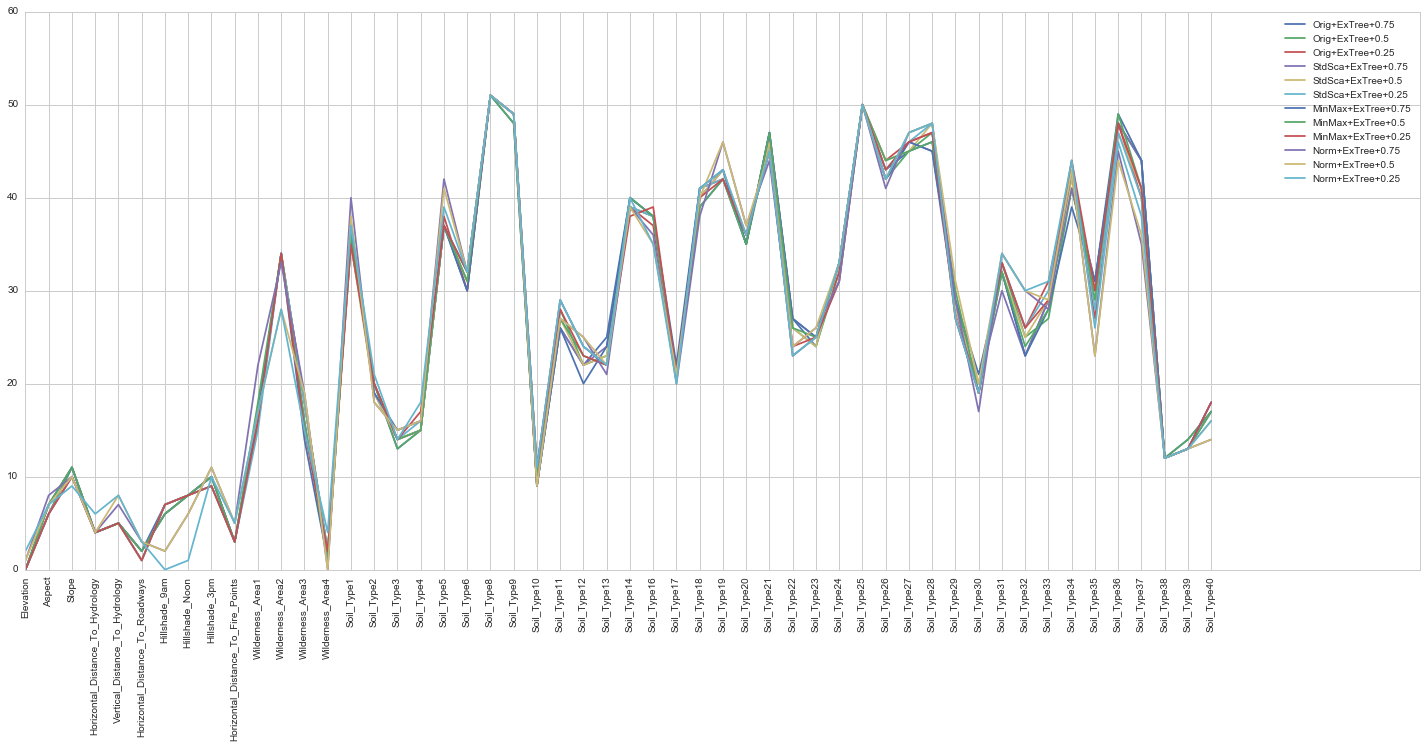

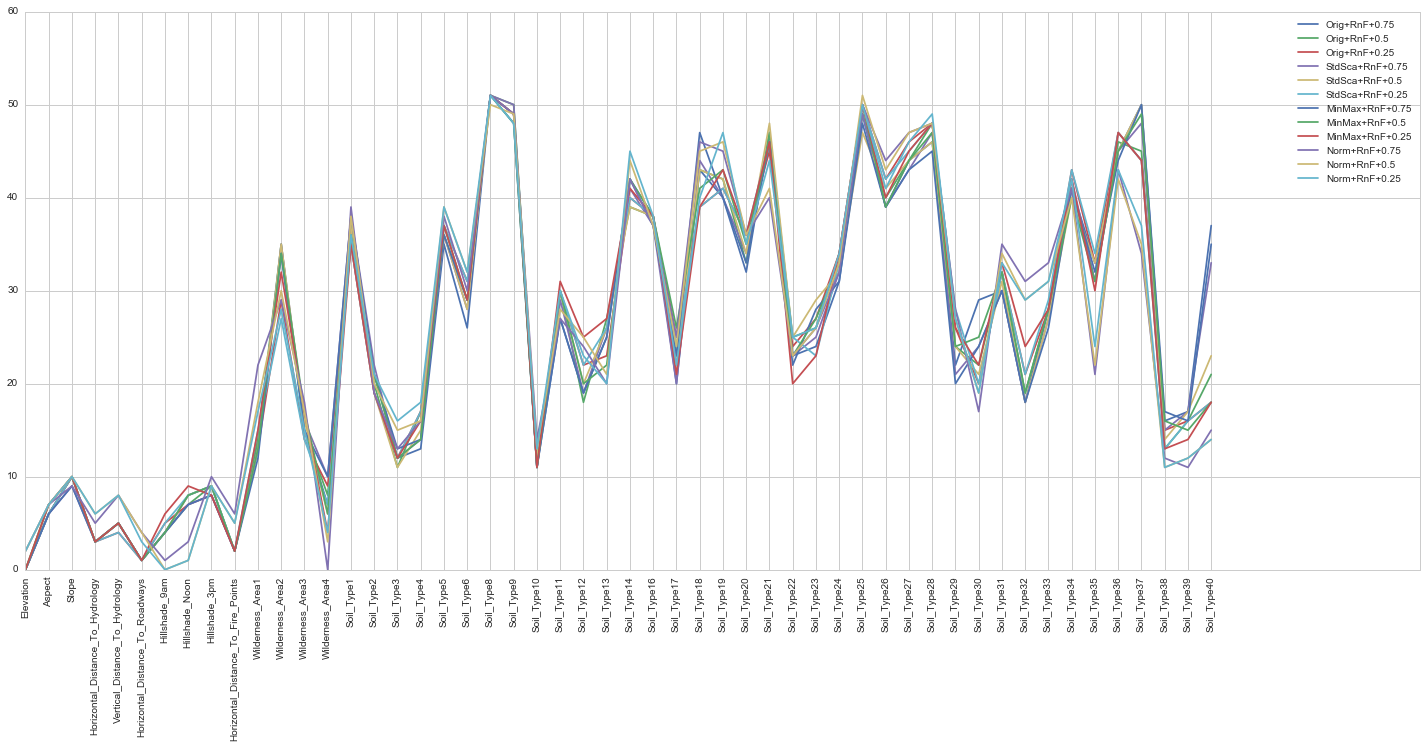

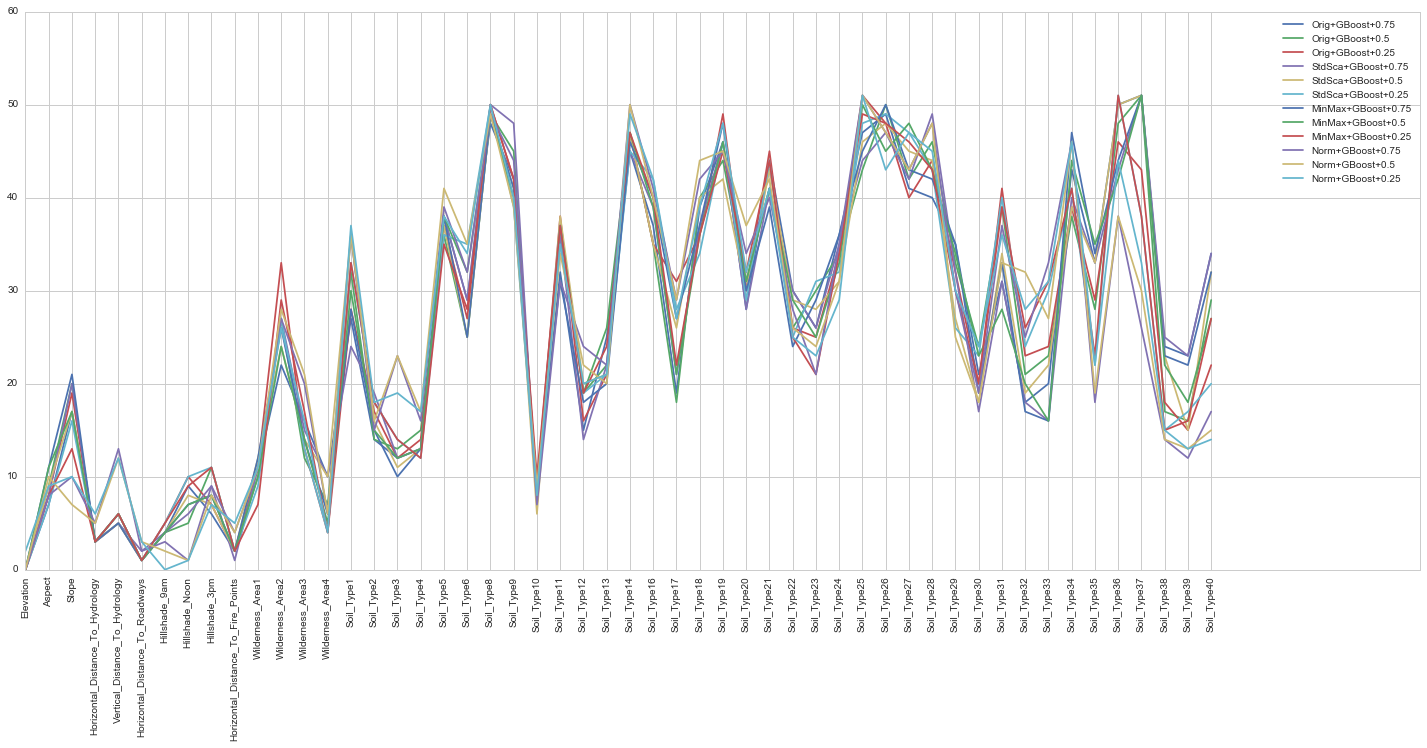

In [64]:
# plot the results, because we use three learning models, so we should have three figures.
# In each figure, we should have 4 different standardization transform (include Original form) and proportion we want 
# to keep

#for method in methods:
#    plt.figure
#    for standardTrans, m, _, propVal, _,_, rank_allFeature_list_sort,_,_,_,_ in trans_data_rank_featureSelect_featureDiscard_list:
#        if m == method:
#            plt.plot(rank_allFeature_list_sort)

            
plt.rc("figure", figsize=(25, 10))

#Plot a graph for different feature selectors        
for method in methods:
    #Array to store the list of combinations
    leg=[]
    fig, ax = plt.subplots()
    #Plot each combination
    for trans,name,detail, propVal, _, _, rank_list,_,_,_,_ in trans_data_rank_featureSelect_featureDiscard_list:
        if(name==method):
            rank_list = np.squeeze(rank_list)[:,0]
            plt.plot(rank_list)
            leg.append(trans+"+"+name+"+%s"% propVal)
    #Set the tick names to names of columns
    ax.set_xticks(range(trainX_colNum))
    ax.set_xticklabels(colName,rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    

### feature selection -- Recursive Feature Elimination-CV

In [89]:
#methods = ['RFE_LR', 'RFE_DT']
methods = ['RFE_LR']

In [90]:
propVals

[0.75, 0.5, 0.25]

activate Recursive feature elimination method

In [101]:
from sklearn.feature_selection import RFECV, RFE

# RFECV needs to specify the based learner, here we might want to use two base learners
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [102]:
method_propVal_combination_RFE = []

for method in methods:
    for propVal in propVals:
        if method == 'RFE_LR':
            model = LogisticRegression(random_state=seed)
        elif method == 'RFE_DT':
            model = DecisionTreeClassifier(max_features=int(propVal*trainX_colNum), random_state=seed)
#        elif method == 'GBoost':
#            model = GradientBoostingClassifier(n_estimators=trainX_colNum, max_features=propVal)
#        
        method_propVal_combination_RFE.append([method, method+' + %.2f important features'%propVal, propVal, model])

method_propVal_combination_RFE

[['RFE_LR',
  'RFE_LR + 0.75 important features',
  0.75,
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)],
 ['RFE_LR',
  'RFE_LR + 0.50 important features',
  0.5,
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)],
 ['RFE_LR',
  'RFE_LR + 0.25 important features',
  0.25,
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)]]

In [103]:
trans_data_rank_featureSelect_featureDiscard_list_RFECV = []

# loop over all types data (original format and all three types of standardization)
for standardTrans, _, xtrain, xvalid, _, colNameInData, remCol, rank, i_cols, i_rem in X_all:
    # after read-in xtrain, we want to loop over all models we want to use to evaluate importance
    for method, detail, propVal, model in method_propVal_combination_RFE:
        print(standardTrans, detail)
        model_RFECV = RFE(model, step=int(propVal * trainX_colNum))
        model_RFECV.fit(xtrain, ytrain)
        
        # ---- Here is different from results of ensemble methods, 
        # ---- RFECV returns integer ranking, rather than numeric value as importance
        feature_rank = model_RFECV.ranking_
        
        # create a list to store the current ranks and corresponding index and column name
        feature_rank_idx_colName = []
        
        for i, rank in enumerate(feature_rank):
            feature_rank_idx_colName.append([i, colNameInData[i], rank])
            
        # sort ranks in descending order
        feature_rank_idx_colName_sort = sorted(feature_rank_idx_colName, key = lambda x: x[2])
        
        
        # create a list to store the original index in data and correpsonding rank
        feature_rank_idx = []
        
        # create a list to store the index of features we want to keep
        feature_keep_idx = []
        
        # create a list to store the column name of features we want to keep
        feature_keep_colNmae = []
        
        # create a list to store the index of features we want to discard
        feature_discard_idx = []
        
        # create a list to store the column name of features we want to discard
        feature_discard_colName = []
        
        # how many features we want to keep as an important features
        varImgNum = int(propVal * trainX_colNum)
        
        # loop over the ranking list
        for idxInOGData, colNameFeat, rank in feature_rank_idx_colName_sort:
            feature_rank_idx.append([idxInOGData, rank-1])
            
            # if the current index is less than number of features 
            # then we store the current feature as important feature
            if (rank-1) < varImgNum:
                feature_keep_idx.append(idxInOGData)
                feature_keep_colNmae.append(colNameFeat)
            else:
                feature_discard_idx.append(idxInOGData)
                feature_discard_colName.append(colNameFeat)
        
            # we want to sort the rank_allFeature list to order becomes
            # rank 1 -- x-th column in data --> rank x -- 0-th column in data
            # rank 2 -- y-th column in data --> rank y -- 1-st column in data
            # rank 3 -- z-th column in data --> rank z -- 2-nd column in data
            feature_rank_idx = sorted(feature_rank_idx, key=lambda x: x[1])
            
        # store the ranks obtained by current standardization and propoVal and methods
        trans_data_rank_featureSelect_featureDiscard_list_RFECV.append([standardTrans, method, detail, propVal,\
        feature_rank_idx, feature_keep_idx, feature_keep_colNmae, feature_discard_idx, feature_discard_colName,\
        xtrain, xvalid])
        

Orig RFE_LR + 0.75 important features
Orig RFE_LR + 0.50 important features
Orig RFE_LR + 0.25 important features
StdSca RFE_LR + 0.75 important features
StdSca RFE_LR + 0.50 important features
StdSca RFE_LR + 0.25 important features
MinMax RFE_LR + 0.75 important features
MinMax RFE_LR + 0.50 important features
MinMax RFE_LR + 0.25 important features
Norm RFE_LR + 0.75 important features
Norm RFE_LR + 0.50 important features
Norm RFE_LR + 0.25 important features


In [104]:
trans_data_rank_featureSelect_featureDiscard_list_RFECV

[['Orig',
  'RFE_LR',
  'RFE_LR + 0.75 important features',
  0.75,
  [[10, 0],
   [11, 0],
   [12, 0],
   [13, 0],
   [14, 0],
   [15, 0],
   [16, 0],
   [17, 0],
   [19, 0],
   [22, 0],
   [24, 0],
   [25, 0],
   [28, 0],
   [31, 0],
   [33, 0],
   [34, 0],
   [35, 0],
   [40, 0],
   [41, 0],
   [42, 0],
   [43, 0],
   [44, 0],
   [46, 0],
   [49, 0],
   [50, 0],
   [51, 0],
   [0, 1],
   [1, 1],
   [2, 1],
   [3, 1],
   [4, 1],
   [5, 1],
   [6, 1],
   [7, 1],
   [8, 1],
   [9, 1],
   [18, 1],
   [20, 1],
   [21, 1],
   [23, 1],
   [26, 1],
   [27, 1],
   [29, 1],
   [30, 1],
   [32, 1],
   [36, 1],
   [37, 1],
   [38, 1],
   [39, 1],
   [45, 1],
   [47, 1],
   [48, 1]],
  [10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   19,
   22,
   24,
   25,
   28,
   31,
   33,
   34,
   35,
   40,
   41,
   42,
   43,
   44,
   46,
   49,
   50,
   51,
   0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   18,
   20,
   21,
   23,
   26,
   27,
   29,
   30,
   32,
   36,
   37

In [94]:
model_RFECV.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [150]:
rank_overall_array = np.zeros((trainX_colNum, len(trans_data_rank_featureSelect_featureDiscard_list)))
for n in np.arange(len(trans_data_rank_featureSelect_featureDiscard_list)):
    rank_comb = np.squeeze(trans_data_rank_featureSelect_featureDiscard_list[n][6])[:,0]
    rank_overall_array[:, n] = rank_comb

rank_overall_array = np.transpose(rank_overall_array)

In [151]:
rank_over_DF = pd.DataFrame(data = rank_overall_array, columns=colName_InOGData)

In [152]:
rank_over_DF.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,...,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.0,6.0,11.0,4.0,5.0,2.0,7.0,8.0,10.0,3.0,16.0,34.0,18.0,1.0,36.0,20.0,13.0,15.0,37.0,30.0,51.0,49.0,9.0,26.0,22.0,...,38.0,21.0,39.0,42.0,35.0,47.0,27.0,24.0,33.0,50.0,43.0,45.0,46.0,28.0,19.0,32.0,23.0,29.0,41.0,31.0,48.0,44.0,12.0,14.0,17.0
1,0.0,6.0,11.0,4.0,5.0,1.0,7.0,8.0,9.0,3.0,16.0,34.0,18.0,2.0,36.0,20.0,13.0,15.0,37.0,31.0,51.0,49.0,10.0,28.0,22.0,...,38.0,21.0,40.0,43.0,35.0,46.0,26.0,24.0,32.0,50.0,42.0,45.0,47.0,29.0,19.0,33.0,25.0,27.0,41.0,30.0,48.0,44.0,12.0,14.0,17.0
2,0.0,6.0,10.0,4.0,5.0,1.0,7.0,8.0,9.0,3.0,16.0,34.0,18.0,2.0,35.0,20.0,14.0,15.0,38.0,30.0,51.0,49.0,11.0,29.0,24.0,...,37.0,21.0,41.0,42.0,36.0,45.0,23.0,25.0,32.0,50.0,44.0,46.0,47.0,28.0,19.0,33.0,26.0,31.0,43.0,27.0,48.0,40.0,12.0,13.0,17.0
3,0.0,6.0,10.0,3.0,5.0,1.0,4.0,8.0,9.0,2.0,14.0,34.0,15.0,7.0,36.0,21.0,12.0,13.0,35.0,26.0,51.0,48.0,11.0,27.0,19.0,...,38.0,20.0,43.0,40.0,32.0,47.0,23.0,24.0,31.0,49.0,39.0,44.0,46.0,22.0,29.0,30.0,18.0,28.0,41.0,33.0,45.0,50.0,16.0,17.0,37.0
4,0.0,6.0,10.0,3.0,5.0,1.0,4.0,7.0,9.0,2.0,14.0,35.0,15.0,8.0,37.0,20.0,11.0,17.0,36.0,29.0,51.0,50.0,12.0,30.0,18.0,...,38.0,23.0,43.0,42.0,33.0,47.0,25.0,26.0,34.0,49.0,40.0,44.0,48.0,24.0,22.0,32.0,19.0,28.0,41.0,31.0,46.0,45.0,13.0,16.0,21.0


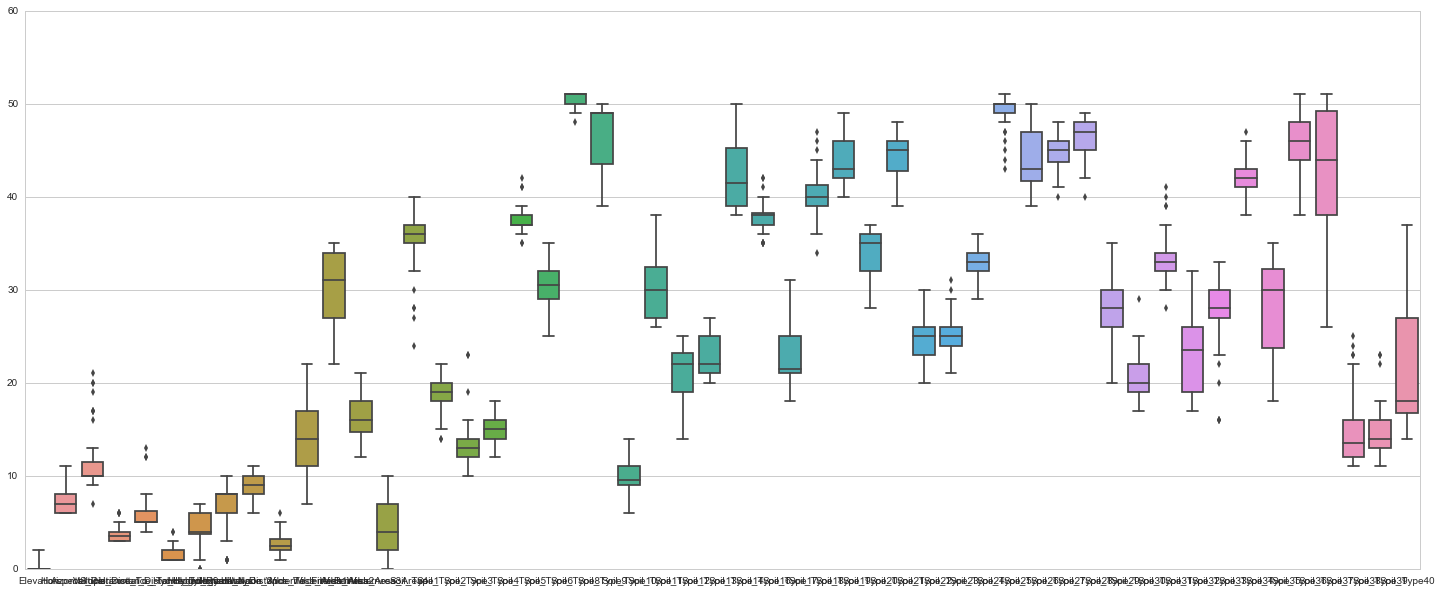

In [154]:
sns.boxplot(rank_over_DF);

In [134]:
rank_over_DF_median = rank_over_DF.median(axis=1)

In [164]:
print(round(rank_over_DF_median,1))

#Write medians to output file for exploratory study on ML algorithms
with open("median.csv", "w") as subfile:
       subfile.write("Column, Median\n")
       subfile.write(rank_over_DF_median.to_string())

Elevation                              0.0
Aspect                                 7.0
Slope                                 10.0
Horizontal_Distance_To_Hydrology       3.5
Vertical_Distance_To_Hydrology         5.0
Horizontal_Distance_To_Roadways        1.0
Hillshade_9am                          4.0
Hillshade_Noon                         8.0
Hillshade_3pm                          9.0
Horizontal_Distance_To_Fire_Points     2.5
Wilderness_Area1                      14.0
Wilderness_Area2                      31.0
Wilderness_Area3                      16.0
Wilderness_Area4                       4.0
Soil_Type1                            36.0
Soil_Type2                            19.0
Soil_Type3                            13.0
Soil_Type4                            15.0
Soil_Type5                            37.0
Soil_Type6                            30.5
Soil_Type8                            51.0
Soil_Type9                            49.0
Soil_Type10                            9.5
Soil_Type11

# Prediction

## linear algorithms

1. Linear Discriminant Analysis (LDA)

In [167]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

In [159]:
# training data set
print(trans_data_rank_featureSelect_featureDiscard_list[0][4].shape)

# validation data set
print(trans_data_rank_featureSelect_featureDiscard_list[0][5].shape)

(13608, 52)
(1512, 52)


In [166]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(xtrain, ytrain)
ypred = LDA.predict(xvalid)

In [172]:
confMat = confusion_matrix(yvalid, ypred)
accuracy = np.trace(confMat) / len(yvalid)
print(confMat)
print('accuracy of LDA without CV: %f' %accuracy)

[[138  68   2   0   6   1  19]
 [ 51 111   3   0  40   9   2]
 [  0   0 114  26   7  63   0]
 [  0   0  26 172   0  17   0]
 [  8  51  17   0 121  12   0]
 [  2  18  60  10  11 127   0]
 [ 24   4   0   0   1   0 171]]
accuracy of LDA without CV: 0.630952


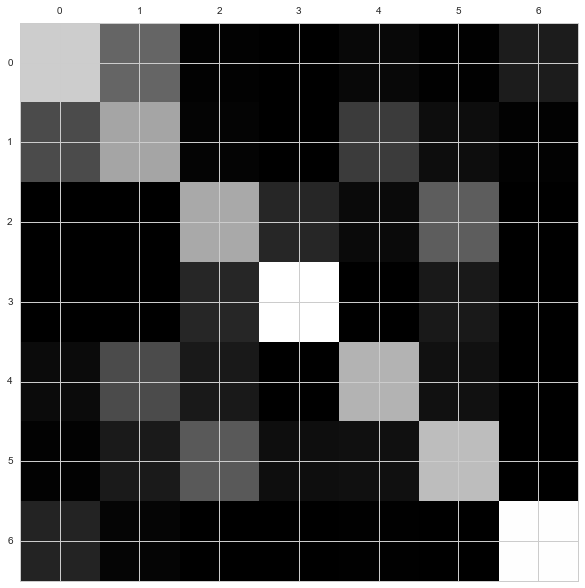

In [181]:
plt.matshow(confMat, cmap=plt.cm.gray);

In [183]:
#row_sums = confMat.sum(axis=1, keepdims=True)
#norm_confMat = confMat / row_sums
#np.fill_diagonal(norm_confMat, 0)
#plt.matshow(norm_confMat, cmap=plt.cm.gray);

## Nonlinear algorithm -- Random forest

In [185]:
RF = RandomForestClassifier(n_estimators=trainX_colNum, max_features=0.75)
RF.fit(xtrain, ytrain)
ypred = RF.predict(xvalid)
confMat_RF = confusion_matrix(yvalid, ypred)
accuracy_RF = np.trace(confMat_RF) / len(yvalid)
print('accuracy of Random forest without CV: %f' %accuracy_RF)
print(confMat_RF)

accuracy of Random forest without CV: 0.831349
[[173  37   1   0   8   0  15]
 [ 47 138   5   0  21   3   2]
 [  0   2 165  17   1  25   0]
 [  0   0   2 208   0   5   0]
 [  1   9   6   0 192   1   0]
 [  3   2  31   3   2 187   0]
 [  5   1   0   0   0   0 194]]


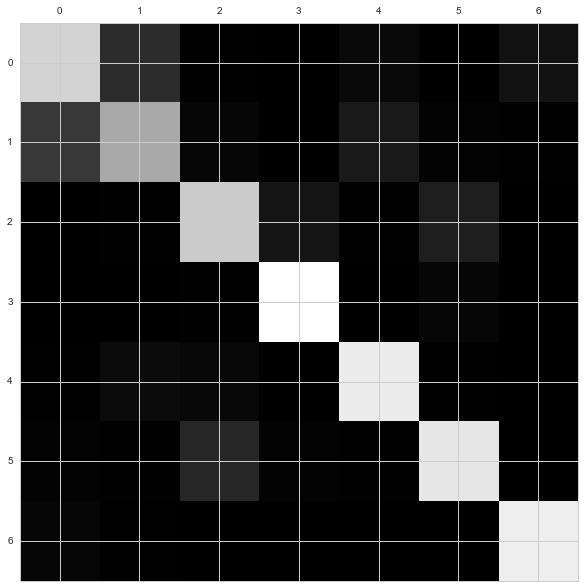

In [186]:
plt.matshow(confMat_RF, cmap=plt.cm.gray);

In [187]:
len(trans_data_rank_featureSelect_featureDiscard_list)

36

## Nonlinear algorithm -- ExtraTreesClassifier

accuracy of extra tree classifier is: 0.864418
[[183  34   1   0   5   0  11]
 [ 45 148   5   0  14   3   1]
 [  0   0 177  13   3  17   0]
 [  0   0   3 206   0   6   0]
 [  0   5   2   0 202   0   0]
 [  2   2  25   3   1 195   0]
 [  3   1   0   0   0   0 196]]


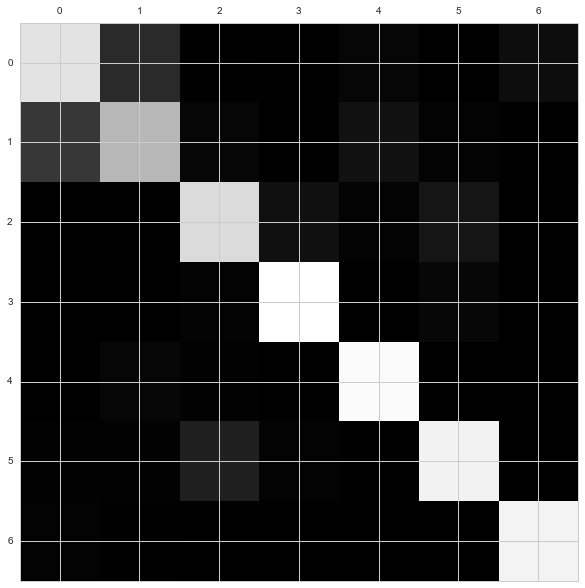

In [189]:
ExTreeClf = ExtraTreesClassifier(n_estimators=trainX_colNum, max_features=0.75)
ExTreeClf.fit(xtrain, ytrain)
ypred_ExTreeClf = ExTreeClf.predict(xvalid)
confMat_ExTreeClf = confusion_matrix(yvalid, ypred_ExTreeClf)
accuracy_ExTreeClf = np.trace(confMat_ExTreeClf) / len(yvalid)
print('accuracy of extra tree classifier is: %f' %accuracy_ExTreeClf)
print(confMat_ExTreeClf)
plt.matshow(confMat_ExTreeClf, cmap=plt.cm.gray);

In [193]:
#row_sums = confMat_ExTreeClf.sum(axis=1, keepdims=True)
#norm_confMat_ExTreeClf = confMat_ExTreeClf / row_sums
#np.fill_diagonal(norm_confMat_ExTreeClf, 0)
#plt.matshow(norm_confMat_ExTreeClf, cmap=plt.cm.gray);